<a href="https://colab.research.google.com/github/owilli38/DSBA-6156/blob/main/DSBA6156%2C_EDA_Assignment_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Owen Williamson
DSBA 6156
Due: Wednesday, January 21

In [ ]:
#Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Part 1: Data Intake and Quality Audit**

In [ ]:
# 1. Load Schema and Check
import kagglehub

# Download latest version
path = kagglehub.dataset_download("valakhorasani/bank-transaction-dataset-for-fraud-detection")

print("Path to dataset files:", path)

import os
df = pd.read_csv(os.path.join(path, 'bank_transactions_data_2.csv'))

100%|██████████| 102k/102k [00:00<00:00, 45.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/versions/4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [ ]:
df.isna().sum()
# the data is clean, showing there are no NAs

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [ ]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

In [ ]:
# 2. Integrity & Consistency
assert df['TransactionID'].is_unique
(df['TransactionAmount'] < 0).sum()
df['TransactionType'].value_counts()
df['Channel'].value_counts()

,count
Channel,
Branch,868
ATM,833
Online,811


Text(0.5, 1.0, 'Missing Values Heatmap')

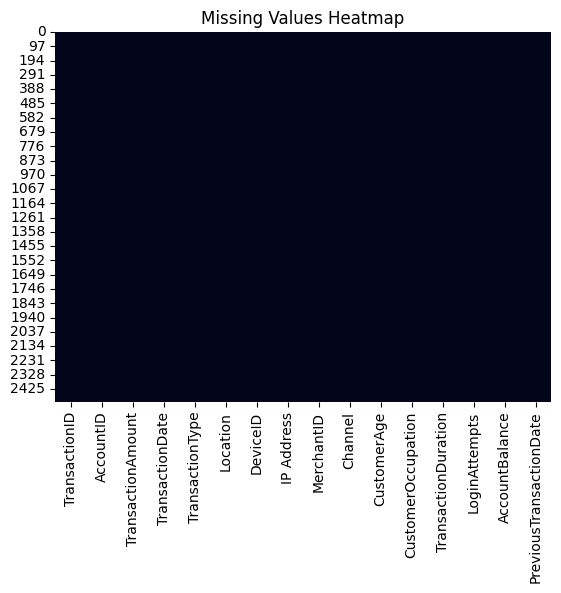

In [ ]:
# 3. Basic Profiling
sns.heatmap(df.isna(), cbar=False); plt.title('Missing Values Heatmap')


This heatmap further confirms there are no missing values, as the black illustrates no missing values in the dataset.

In [ ]:
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,NaN,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,NaN
top,TX002496,AC00460,NaN,NaN,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,NaN
freq,1,12,NaN,NaN,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,NaN
mean,NaN,NaN,297.593778,2023-07-05 20:32:10.826433024,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024
min,NaN,NaN,0.260000,2023-01-02 16:00:06,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,NaN,NaN,81.885000,2023-04-03 16:22:05.750000128,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,2024-11-04 08:07:53
50%,NaN,NaN,211.140000,2023-07-07 17:49:43.500000,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,2024-11-04 08:09:22
75%,NaN,NaN,414.527500,2023-10-06 18:40:53.500000,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872
max,NaN,NaN,1919.110000,2024-01-01 18:21:50,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,300.000000,5.000000,14977.990000,2024-11-04 08:12:23


**Part 2: Business-Oriented EDA**

In [ ]:
# 1. Activity by Account
tx_per_acct = df.groupby('AccountID').size().sort_values(ascending=False)
tx_per_acct.head(10)


,0
AccountID,
AC00460,12
AC00363,12
AC00362,12
AC00202,12
AC00480,11
AC00257,11
AC00225,11
AC00456,11
AC00304,11


Text(0.5, 1.0, 'Transactions per Account')

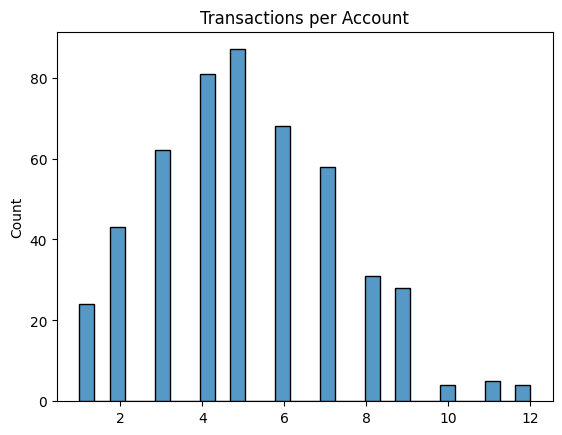

In [ ]:
sns.histplot(tx_per_acct, bins=30); plt.title('Transactions per Account')

Text(0.5, 1.0, 'Inter-Transaction Seconds')

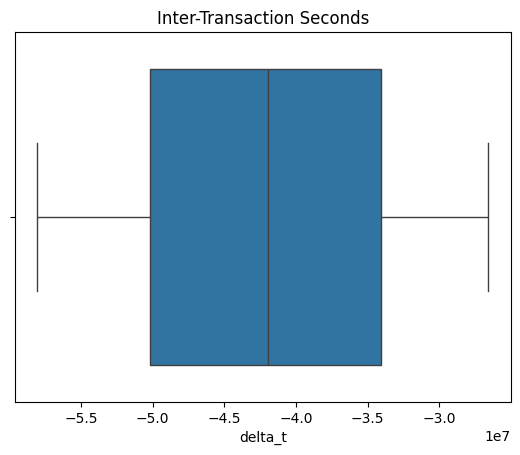

In [ ]:
# 2. Time Spacing between Transactions
df['delta_t'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds()
sns.boxplot(x=df['delta_t']); plt.title('Inter-Transaction Seconds')


Text(0.5, 1.0, 'Accounts per City')

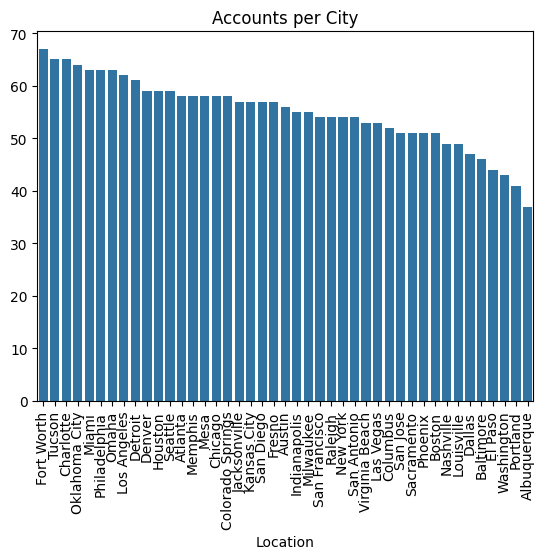

In [ ]:
# 3. Geographic Sanity Checks (City)
accounts_per_city = df.groupby('Location')['AccountID'].nunique().sort_values(ascending=False)
tx_per_city = df.groupby('Location').size().sort_values(ascending=False)
sns.barplot(x=accounts_per_city.index, y=accounts_per_city.values)
plt.xticks(rotation=90)
plt.title('Accounts per City')


Text(0.5, 1.0, 'Merchant Diversity per Account')

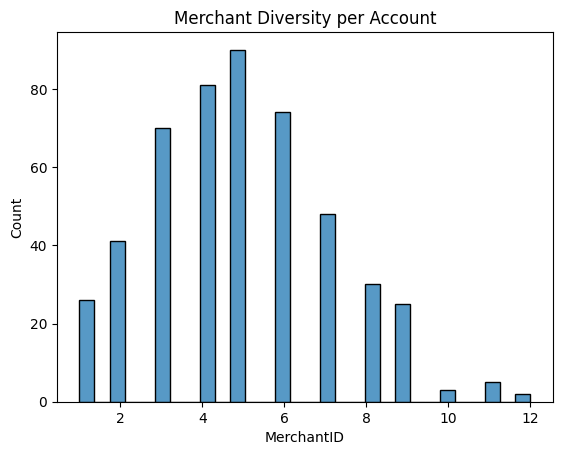

In [ ]:
# 4. Merchant Concentration
top_merchants = df.groupby('MerchantID')['TransactionAmount'].agg(['count','sum']).sort_values('count', ascending=False)
merch_diversity = df.groupby('AccountID')['MerchantID'].nunique()
sns.histplot(merch_diversity, bins=30); plt.title('Merchant Diversity per Account')


TransactionAmount            TransactionDuration LoginAttempts
                    count        sum              median        median
Channel                                                               
ATM                   833  256331.43               116.0           1.0
Branch                868  250183.00               109.0           1.0
Online                811  241041.14               114.0           1.0

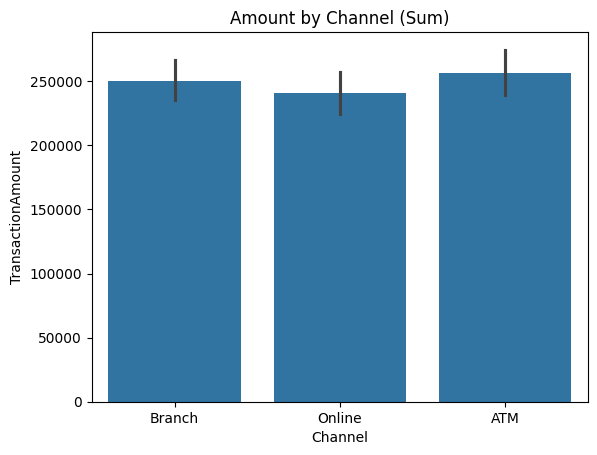

In [ ]:
# 5. Channel Mix & Journey Metrics
channel_summary = df.groupby('Channel').agg({'TransactionAmount':['count','sum'], 'TransactionDuration':'median', 'LoginAttempts':'median'})
sns.barplot(x='Channel', y='TransactionAmount', data=df, estimator=sum); plt.title('Amount by Channel (Sum)')
display(channel_summary)

<Axes: xlabel='DeviceID'>

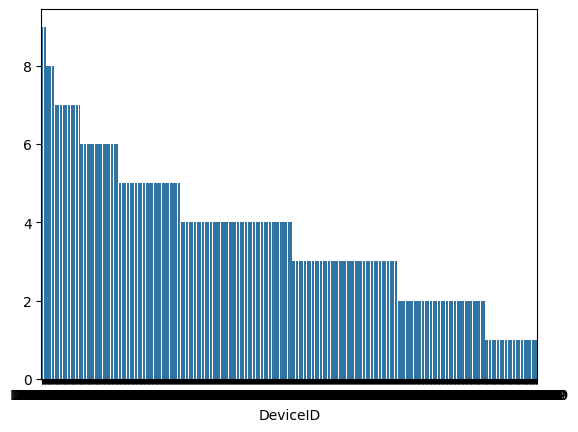

In [ ]:
# 6. Device & IP Reuse
accounts_per_device = df.groupby('DeviceID')['AccountID'].nunique().sort_values(ascending=False)
accounts_per_ip = df.groupby('IP Address')['AccountID'].nunique().sort_values(ascending=False)
sns.barplot(x=accounts_per_device.index, y=accounts_per_device.values)

<Axes: xlabel='IP Address'>

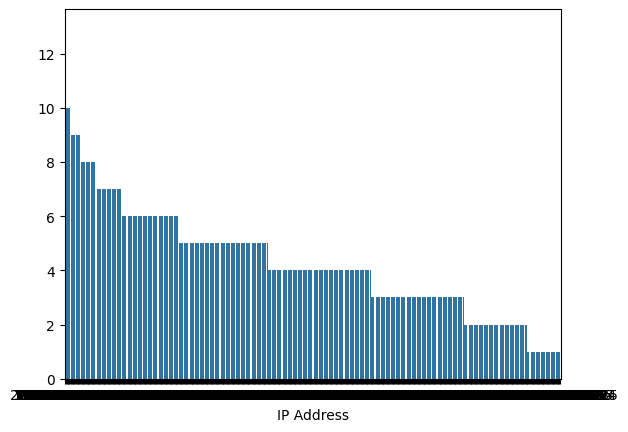

In [ ]:
sns.barplot(x=accounts_per_ip.index, y=accounts_per_ip.values)

In [ ]:
display(accounts_per_device.head())

,AccountID
DeviceID,
D000315,9
D000451,9
D000142,9
D000203,9
D000663,9


In [ ]:
display(accounts_per_ip.head())

,AccountID
IP Address,
200.136.146.93,13
49.31.186.82,11
9.230.41.239,10
173.135.78.201,10
147.119.62.178,10


In [ ]:
display(accounts_per_device[accounts_per_device > 1].sort_values(ascending=False).head(10))

display(accounts_per_ip[accounts_per_ip > 1].sort_values(ascending=False).head(10))

,AccountID
DeviceID,
D000697,9
D000548,9
D000142,9
D000203,9
D000451,9
D000663,9
D000315,9
D000280,8
D000046,8


,AccountID
IP Address,
200.136.146.93,13
49.31.186.82,11
147.119.62.178,10
166.79.195.157,10
9.230.41.239,10
173.135.78.201,10
101.90.40.193,9
101.223.82.253,9
77.7.223.184,9


The above charts and the graphs show potential device & IP reuse for the accounts, where multiple accounts are listed forboth devices and IP IDs.

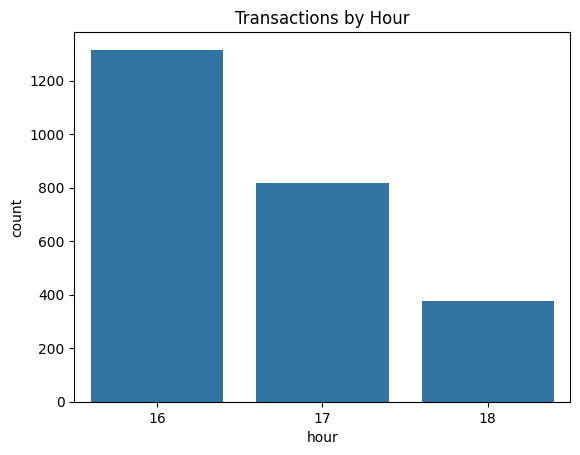

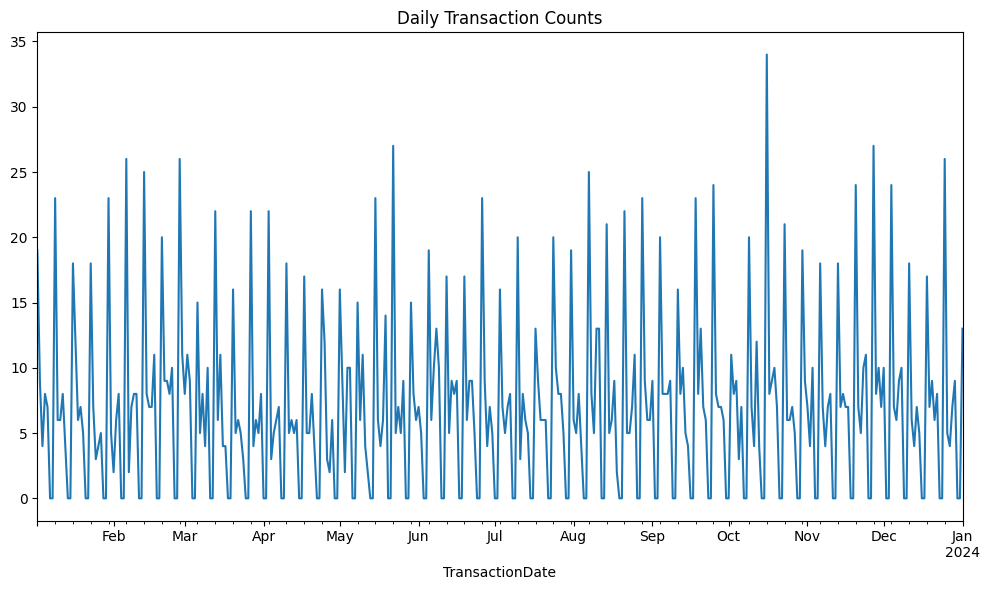

In [ ]:
# 7. Temporal (Time) Patterns
df['hour'] = df['TransactionDate'].dt.hour
df['weekday'] = df['TransactionDate'].dt.day_name()
sns.countplot(x='hour', data=df); plt.title('Transactions by Hour')

fig, ax = plt.subplots(figsize=(10, 6))
daily = df.set_index('TransactionDate').groupby(pd.Grouper(freq='D')).size()
daily.plot(ax=ax, title='Daily Transaction Counts')
plt.tight_layout()
plt.show()

In [ ]:
# 8. Amount vs Balance Dynamics
# Example expectation checks (illustrative)
df.groupby('TransactionType')['TransactionAmount'].describe()
# Create simple derived feature for analysis
df['balance_to_amount_ratio'] = df['AccountBalance'] / (df['TransactionAmount'].replace(0, pd.NA))


In [ ]:
df = df.sort_values(by=['AccountID', 'TransactionDate']).reset_index(drop=True)
print("DataFrame sorted by AccountID and TransactionDate.")

DataFrame sorted by AccountID and TransactionDate.


In [ ]:
df['actual_balance_change'] = df.groupby('AccountID')['AccountBalance'].diff().fillna(0)
df['expected_balance_change'] = df['TransactionAmount'].copy()
df.loc[df['TransactionType'] == 'Debit', 'expected_balance_change'] *= -1

In [ ]:
df['balance_discrepancy'] = df['actual_balance_change'] - df['expected_balance_change']
num_discrepancies = (df['balance_discrepancy'] != 0).sum()

print(f"Total number of balance discrepancies: {num_discrepancies}")
print("\nDescriptive statistics for 'balance_discrepancy':")
display(df['balance_discrepancy'].describe())

Total number of balance discrepancies: 2512

Descriptive statistics for 'balance_discrepancy':


,balance_discrepancy
count,2512.000000
mean,259.874932
std,5014.491010
min,-15454.720000
25%,-2451.470000
50%,173.670000
75%,2944.950000
max,14998.930000


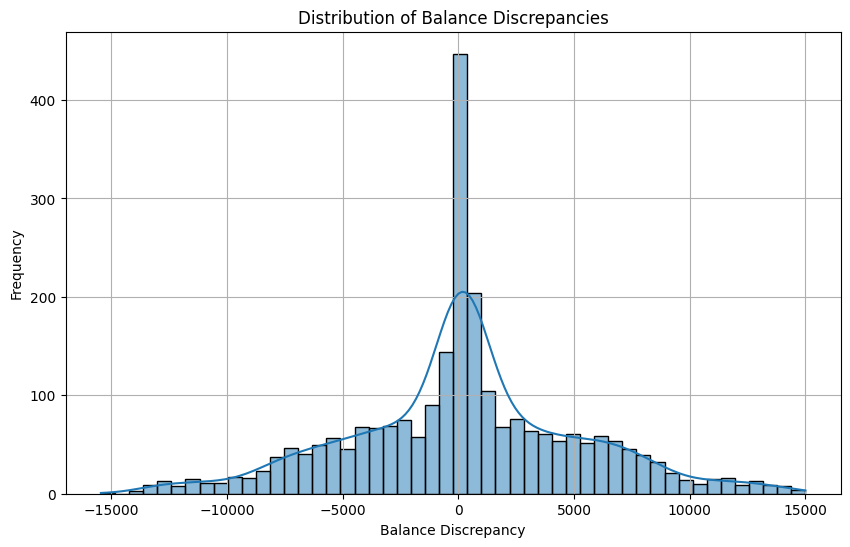

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['balance_discrepancy'], bins=50, kde=True)
plt.title('Distribution of Balance Discrepancies')
plt.xlabel('Balance Discrepancy')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

A bank would want balance discrepancy to be 0. We can see wide ranges, and while most are centered around 0, the discrepancies would want to be corrected for incorrect transcaction records, missing fees, etc.

AI Acknowledgement: I used Gemini/Generative AI to assist with debugging lines of code.